Base de Dados: https://www.tesourotransparente.gov.br/ckan/dataset

In [1]:
import pandas as pd
import yfinance as yf
import cufflinks as cf
cf.go_offline()
from plotly.subplots import make_subplots

# pd.set_option("display.max_colwidth", 150)
# pd.set_option("display.min_rows", 20)

import matplotlib
# matplotlib.style.use('seaborn-darkgrid')
matplotlib.rcParams['figure.figsize'] = (18,8)
import plotly.express as px

import plotly.graph_objects as go

# import plotly.io as pio
# pio.renderers.default = 'png'  ## comentar se quiser grafico interativo

In [2]:
def busca_titulos(tipo=None):
  url = 'https://www.tesourotransparente.gov.br/ckan/dataset/df56aa42-484a-4a59-8184-7676580c81e3/resource/796d2059-14e9-44e3-80c9-2d9e30b405c1/download/PrecoTaxaTesouroDireto.csv'
  df  = pd.read_csv(url, sep=';', decimal=',')
  df['Data Vencimento'] = pd.to_datetime(df['Data Vencimento'], dayfirst=True)
  df['Data Base']       = pd.to_datetime(df['Data Base'], dayfirst=True)
  multi_indice = pd.MultiIndex.from_frame(df.iloc[:, :3])
  df = df.set_index(multi_indice).iloc[: , 3:]  
  if tipo is None:
    return df.sort_index()
  else:
      return df[df.index.get_level_values(0) == tipo]

busca por tipo

In [3]:
busca_titulos('Tesouro Selic')

Taxa Compra Manha  Taxa Venda Manha  \
Tipo Titulo   Data Vencimento Data Base                                         
Tesouro Selic 2012-03-07      2009-06-30                0.0              0.03   
              2011-03-16      2009-06-30                0.0              0.02   
              2010-03-17      2009-06-30                0.0              0.01   
              2014-03-07      2009-06-30                0.0              0.04   
              2013-03-07      2009-06-30                0.0              0.04   
...                                                     ...               ...   
              2014-03-07      2010-04-01                0.0              0.04   
              2013-03-07      2010-04-01                0.0              0.03   
              2012-03-07      2010-04-01                0.0              0.02   
              2015-03-07      2010-04-01                0.0              0.04   
              2011-03-16      2010-04-01                0.0              0.01   

                                          PU Compra Manha  PU Venda Manha  \
Tipo Titulo   Data Vencimento Data Base                                     
Tesouro Selic 2012-03-07      2009-06-30          3928.58         3925.42   
              2011-03-16      2009-06-30          3928.58         3927.24   
              2010-03-17      2009-06-30          3928.58         3928.30   
              2014-03-07      2009-06-30          3928.58         3921.24   
              2013-03-07      2009-06-30          3928.58         3922.82   
...                                                   ...             ...   
              2014-03-07      2010-04-01          4183.41         4176.86   
              2013-03-07      2010-04-01          4183.41         4179.75   
              2012-03-07      2010-04-01          4183.41         4181.80   
              2015-03-07      2010-04-01          4183.41         4175.18   
              2011-03-16      2010-04-01          4183.41         4183.02   

                                          PU Base Manha  
Tipo Titulo   Data Vencimento Data Base                  
Tesouro Selic 2012-03-07      2009-06-30        3924.04  
              2011-03-16      2009-06-30        3925.86  
              2010-03-17      2009-06-30        3926.92  
              2014-03-07      2009-06-30        3919.86  
              2013-03-07      2009-06-30        3921.43  
...                                                 ...  
              2014-03-07      2010-04-01        4175.46  
              2013-03-07      2010-04-01        4178.36  
              2012-03-07      2010-04-01        4180.41  
              2015-03-07      2010-04-01        4173.78  
              2011-03-16      2010-04-01        4181.62  

[20683 rows x 5 columns]

busca todos

In [4]:
titulos = busca_titulos()
titulos

Taxa Compra Manha  \
Tipo Titulo    Data Vencimento Data Base                       
Tesouro Educa+ 2030-12-15      2023-08-01               5.06   
                               2023-08-02               5.05   
                               2023-08-03               5.02   
                               2023-08-04               5.02   
                               2023-08-07               4.98   
...                                                      ...   
Tesouro Selic  2031-03-01      2026-01-08               0.10   
                               2026-01-09               0.10   
                               2026-01-12               0.10   
                               2026-01-13               0.10   
                               2026-01-14               0.10   

                                           Taxa Venda Manha  PU Compra Manha  \
Tipo Titulo    Data Vencimento Data Base                                       
Tesouro Educa+ 2030-12-15      2023-08-01              5.18          3248.87   
                               2023-08-02              5.17          3251.07   
                               2023-08-03              5.14          3256.24   
                               2023-08-04              5.14          3257.13   
                               2023-08-07              5.10          3263.78   
...                                                     ...              ...   
Tesouro Selic  2031-03-01      2026-01-08              0.11         18053.36   
                               2026-01-09              0.11         18063.38   
                               2026-01-12              0.11         18073.59   
                               2026-01-13              0.11         18083.63   
                               2026-01-14              0.11         18093.67   

                                           PU Venda Manha  PU Base Manha  
Tipo Titulo    Data Vencimento Data Base                                  
Tesouro Educa+ 2030-12-15      2023-08-01         3230.41        3230.41  
                               2023-08-02         3232.62        3232.62  
                               2023-08-03         3237.76        3237.76  
                               2023-08-04         3238.49        3238.49  
                               2023-08-07         3245.29        3245.29  
...                                                   ...            ...  
Tesouro Selic  2031-03-01      2026-01-08        18034.08       18034.08  
                               2026-01-09        18044.09       18044.09  
                               2026-01-12        18054.31       18054.31  
                               2026-01-13        18064.34       18064.34  
                               2026-01-14        18074.37       18074.37  

[166256 rows x 5 columns]

tipos

In [5]:
titulos.index.droplevel(level=1).droplevel(level=1).drop_duplicates().to_list()

['Tesouro Educa+',
 'Tesouro IGPM+ com Juros Semestrais',
 'Tesouro IPCA+',
 'Tesouro IPCA+ com Juros Semestrais',
 'Tesouro Prefixado',
 'Tesouro Prefixado com Juros Semestrais',
 'Tesouro Renda+ Aposentadoria Extra',
 'Tesouro Selic']

In [6]:
busca_titulos('Tesouro IPCA+ com Juros Semestrais')

Taxa Compra Manha  \
Tipo Titulo                        Data Vencimento Data Base                       
Tesouro IPCA+ com Juros Semestrais 2017-05-15      2009-06-30               6.71   
                                   2020-08-15      2009-06-30               6.59   
                                   2024-08-15      2009-06-30               6.52   
                                   2035-05-15      2009-06-30               6.51   
                                   2045-05-15      2009-06-30               6.51   
...                                                                          ...   
                                   2015-05-15      2010-04-01               6.34   
                                   2012-08-15      2010-04-01               6.22   
                                   2013-05-15      2010-04-01               6.35   
                                   2011-05-15      2010-04-01               5.39   
                                   2010-08-15      2010-04-01               4.87   

                                                               Taxa Venda Manha  \
Tipo Titulo                        Data Vencimento Data Base                      
Tesouro IPCA+ com Juros Semestrais 2017-05-15      2009-06-30              6.77   
                                   2020-08-15      2009-06-30              6.67   
                                   2024-08-15      2009-06-30              6.60   
                                   2035-05-15      2009-06-30              6.61   
                                   2045-05-15      2009-06-30              6.61   
...                                                                         ...   
                                   2015-05-15      2010-04-01              6.40   
                                   2012-08-15      2010-04-01              6.26   
                                   2013-05-15      2010-04-01              6.39   
                                   2011-05-15      2010-04-01              5.41   
                                   2010-08-15      2010-04-01              4.89   

                                                               PU Compra Manha  \
Tipo Titulo                        Data Vencimento Data Base                     
Tesouro IPCA+ com Juros Semestrais 2017-05-15      2009-06-30          1773.11   
                                   2020-08-15      2009-06-30          1794.51   
                                   2024-08-15      2009-06-30          1789.05   
                                   2035-05-15      2009-06-30          1738.12   
                                   2045-05-15      2009-06-30          1725.50   
...                                                                        ...   
                                   2015-05-15      2010-04-01          1920.80   
                                   2012-08-15      2010-04-01          1909.76   
                                   2013-05-15      2010-04-01          1930.36   
                                   2011-05-15      2010-04-01          1959.70   
                                   2010-08-15      2010-04-01          1926.22   

                                                               PU Venda Manha  \
Tipo Titulo                        Data Vencimento Data Base                    
Tesouro IPCA+ com Juros Semestrais 2017-05-15      2009-06-30         1766.84   
                                   2020-08-15      2009-06-30         1783.74   
                                   2024-08-15      2009-06-30         1775.93   
                                   2035-05-15      2009-06-30         1717.04   
                                   2045-05-15      2009-06-30         1702.30   
...                                                                       ...   
                                   2015-05-15      2010-04-01         1916.06   
                                   2012-08-15      2010-04-01         1908.15   
             

historico das taxas do tesouro  IPCA+ com Juros Semestrai 2035

In [7]:
titulos.loc[('Tesouro IPCA+ com Juros Semestrais','2035-01-01'):('Tesouro IPCA+ com Juros Semestrais','2035-12-30')]

Taxa Compra Manha  \
Tipo Titulo                        Data Vencimento Data Base                       
Tesouro IPCA+ com Juros Semestrais 2035-05-15      2006-04-12               8.04   
                                                   2006-04-13               8.05   
                                                   2006-04-17               8.09   
                                                   2006-04-18               8.10   
                                                   2006-04-19               8.09   
...                                                                          ...   
                                                   2026-01-08               7.51   
                                                   2026-01-09               7.50   
                                                   2026-01-12               7.51   
                                                   2026-01-13               7.54   
                                                   2026-01-14               7.51   

                                                               Taxa Venda Manha  \
Tipo Titulo                        Data Vencimento Data Base                      
Tesouro IPCA+ com Juros Semestrais 2035-05-15      2006-04-12              8.14   
                                                   2006-04-13              8.15   
                                                   2006-04-17              8.19   
                                                   2006-04-18              8.20   
                                                   2006-04-19              8.19   
...                                                                         ...   
                                                   2026-01-08              7.63   
                                                   2026-01-09              7.62   
                                                   2026-01-12              7.63   
                                                   2026-01-13              7.66   
                                                   2026-01-14              7.63   

                                                               PU Compra Manha  \
Tipo Titulo                        Data Vencimento Data Base                     
Tesouro IPCA+ com Juros Semestrais 2035-05-15      2006-04-12          1279.73   
                                                   2006-04-13          1279.30   
                                                   2006-04-17          1274.17   
                                                   2006-04-18          1273.27   
                                                   2006-04-19          1275.19   
...                                                                        ...   
                                                   2026-01-08          4193.03   
                                                   2026-01-09          4198.00   
                                                   2026-01-12          4196.89   
                                                   2026-01-13          4190.28   
                                                   2026-01-14          4200.20   

                                                               PU Venda Manha  \
Tipo Titulo                        Data Vencimento Data Base                    
Tesouro IPCA+ com Juros Semestrais 2035-05-15      2006-04-12         1265.68   
                                                   2006-04-13         1265.27   
                                                   2006-04-17         1260.24   
                                                   2006-04-18         1259.37   
                                                   2006-04-19         1261.26   
...                                                                       ...   
                                                   2026-01-08         4158.46   
                                                   2026-01-09         4162.52   
             

In [8]:
hist = titulos.loc[('Tesouro IPCA+ com Juros Semestrais','2035-01-01'):('Tesouro IPCA+ com Juros Semestrais','2035-12-30')].reset_index(level=[0, 1], drop=True)
hist

Taxa Compra Manha  Taxa Venda Manha  PU Compra Manha  \
Data Base                                                          
2006-04-12               8.04              8.14          1279.73   
2006-04-13               8.05              8.15          1279.30   
2006-04-17               8.09              8.19          1274.17   
2006-04-18               8.10              8.20          1273.27   
2006-04-19               8.09              8.19          1275.19   
...                       ...               ...              ...   
2026-01-08               7.51              7.63          4193.03   
2026-01-09               7.50              7.62          4198.00   
2026-01-12               7.51              7.63          4196.89   
2026-01-13               7.54              7.66          4190.28   
2026-01-14               7.51              7.63          4200.20   

            PU Venda Manha  PU Base Manha  
Data Base                                  
2006-04-12         1265.68        1265.11  
2006-04-13         1265.27        1264.40  
2006-04-17         1260.24        1259.73  
2006-04-18         1259.37        1258.86  
2006-04-19         1261.26        1260.75  
...                    ...            ...  
2026-01-08         4158.46        4158.46  
2026-01-09         4162.52        4162.52  
2026-01-12         4162.33        4162.33  
2026-01-13         4155.82        4155.82  
2026-01-14         4165.64        4165.64  

[4929 rows x 5 columns]

In [9]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=hist.index , y=hist['Taxa Compra Manha']))
fig.update_layout(
    title="Historico da taxa ntnb 2035",
    xaxis_title="Ano",
    yaxis_title="Taxa compra",
    height=600,
    width=800,
    margin=dict(l=50, r=50, t=100, b=100),
    paper_bgcolor="LightYellow"
)
fig.show()

Vendas de titulos do tesouro

In [10]:
def vendas_tesouro(tipo=None):
  url = "https://www.tesourotransparente.gov.br/ckan/dataset/f0468ecc-ae97-4287-89c2-6d8139fb4343/resource/e5f90e3a-8f8d-4895-9c56-4bb2f7877920/download/VendasTesouroDireto.csv"
  df  = pd.read_csv(url, sep=';', decimal=',')
  df['Vencimento do Titulo'] = pd.to_datetime(df['Vencimento do Titulo'], dayfirst=True)
  df['Data Venda']       = pd.to_datetime(df['Data Venda'], dayfirst=True)
  multi_indice = pd.MultiIndex.from_frame(df.iloc[:, :3])
  df = df.set_index(multi_indice).iloc[: , 3:]  
  df.sort_index(inplace=True)
  if tipo is None:
    return df
  else:
    return df[df.index.get_level_values(0) == tipo]


In [11]:
vendas = vendas_tesouro()
vendas


PU  Quantidade  \
Tipo Titulo    Vencimento do Titulo Data Venda                             
Tesouro Educa+ 2030-12-15           2023-08-02   3248.250572      331.84   
                                    2023-08-03   3250.646532      183.44   
                                    2023-08-04   3260.006540      157.49   
                                    2023-08-07   3260.737100      360.67   
                                    2023-08-08   3263.770709      227.79   
...                                                      ...         ...   
Tesouro Selic  2031-03-01           2026-01-07  18032.572258     7967.71   
                                    2026-01-08  18043.044214     6685.20   
                                    2026-01-09  18053.351044     6113.67   
                                    2026-01-12  18063.372430     6197.61   
                                    2026-01-13  18073.579806     6673.64   

                                                       Valor  
Tipo Titulo    Vencimento do Titulo Data Venda                
Tesouro Educa+ 2030-12-15           2023-08-02  1.077899e+06  
                                    2023-08-03  5.962986e+05  
                                    2023-08-04  5.134184e+05  
                                    2023-08-07  1.176050e+06  
                                    2023-08-08  7.434543e+05  
...                                                      ...  
Tesouro Selic  2031-03-01           2026-01-07  1.436783e+08  
                                    2026-01-08  1.206214e+08  
                                    2026-01-09  1.103722e+08  
                                    2026-01-12  1.119497e+08  
                                    2026-01-13  1.206166e+08  

[94409 rows x 3 columns]

In [12]:
selic= vendas_tesouro('Tesouro Selic').reset_index(level=[0, 1], drop=True)

In [13]:
selic

PU  Quantidade         Valor
Data Venda                                        
2002-01-07   1263.007692        2.60  3.283810e+03
2002-01-08   1263.900000        7.60  9.605640e+03
2002-01-09   1264.790000        6.00  7.588740e+03
2002-01-11   1266.821052        3.80  4.813910e+03
2002-01-14   1267.707500        4.00  5.070830e+03
...                  ...         ...           ...
2026-01-07  18032.572258     7967.71  1.436783e+08
2026-01-08  18043.044214     6685.20  1.206214e+08
2026-01-09  18053.351044     6113.67  1.103722e+08
2026-01-12  18063.372430     6197.61  1.119497e+08
2026-01-13  18073.579806     6673.64  1.206166e+08

[10155 rows x 3 columns]

In [14]:
fig = make_subplots(rows=3, cols=1, subplot_titles=("PU", "Valor" , 'Quantidade'))

# Adicionando os traces aos subplots
fig.add_trace(go.Scatter(x=selic.index, y=selic['PU'], mode='lines', name='Dados 1'), row=1, col=1)
fig.add_trace(go.Scatter(x=selic.index, y=selic['Quantidade'], mode='lines', name='Dados 2'), row=2, col=1)
fig.add_trace(go.Scatter(x=selic.index, y=selic['Valor'], mode='lines', name='Dados 2'), row=3, col=1)

# Configurando o layout
fig.update_layout(title="Vendas do Tesouro Selic", showlegend=False)



<Axes: xlabel='Data Venda'>

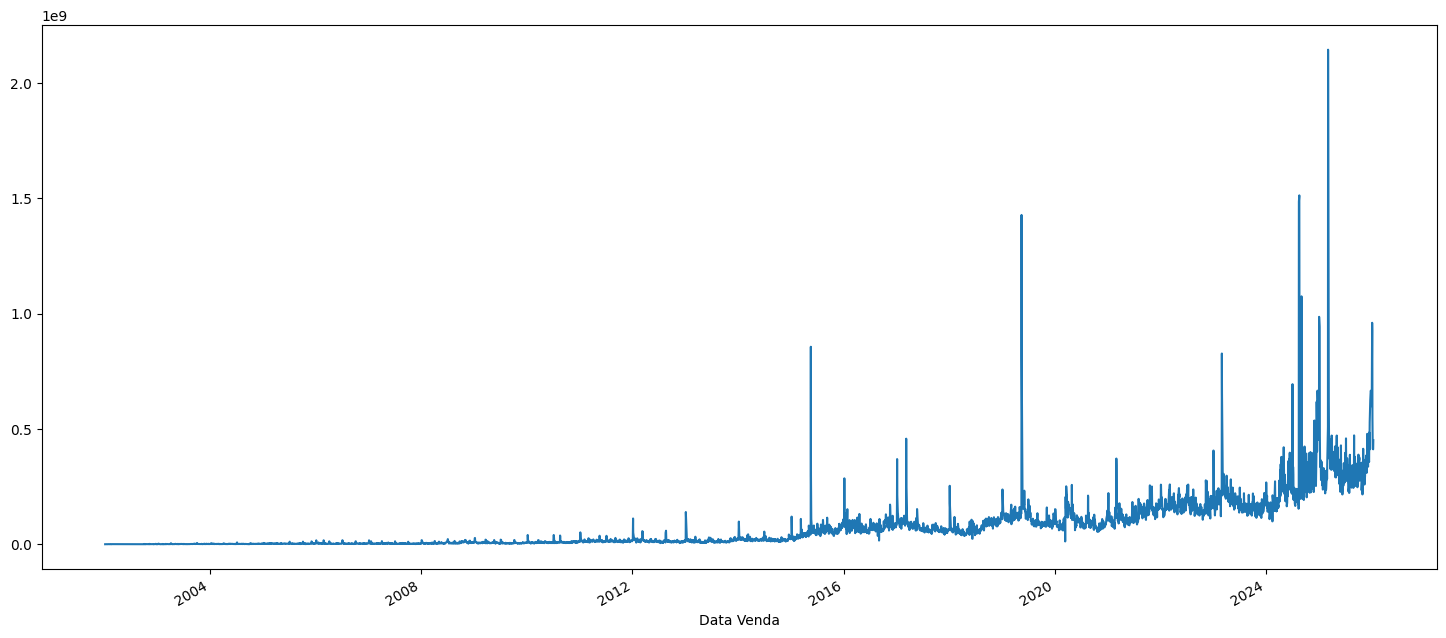

In [15]:
vendas['Valor'].groupby('Data Venda').sum().plot()

recompra -- títulos resgatados antes do vencimento

In [16]:
def recompras():
  url = "https://www.tesourotransparente.gov.br/ckan/dataset/f30db6e4-6123-416c-b094-be8dfc823601/resource/30c2b3f5-6edd-499a-8514-062bfda0f61a/download/RecomprasTesouroDireto.csv"
  df  = pd.read_csv(url, sep=';', decimal=',')
  df['Vencimento do Titulo'] = pd.to_datetime(df['Vencimento do Titulo'], dayfirst=True)
  df['Data Resgate']       = pd.to_datetime(df['Data Resgate'], dayfirst=True)
  multi_indice = pd.MultiIndex.from_frame(df.iloc[:, :2])
  df = df.set_index(multi_indice).iloc[: , 2:]  
  return df.sort_index()

In [17]:
resgate = recompras()
resgate

Data Resgate  Quantidade       Valor
Tipo Titulo    Vencimento do Titulo                                     
Tesouro Educa+ 2030-12-15             2025-01-16      108.69   370897.95
               2030-12-15             2024-12-11      265.45   904486.30
               2030-12-15             2024-12-27      113.60   385114.85
               2030-12-15             2024-11-28      221.63   758302.08
               2030-12-15             2024-11-05      306.19  1047832.82
...                                          ...         ...         ...
Tesouro Selic  2031-03-01             2025-02-12       62.99  1002469.50
               2031-03-01             2025-02-27      275.67  4412817.90
               2031-03-01             2025-02-14       67.50  1075465.26
               2031-03-01             2025-03-05       59.21   948773.34
               2031-03-01             2025-03-18      398.64  6417734.17

[91463 rows x 3 columns]

In [18]:
selic = resgate.loc['Tesouro Selic']
selic

Data Resgate  Quantidade       Valor
Vencimento do Titulo                                     
2005-02-16             2005-01-20       20.60    44929.63
2005-02-16             2005-01-27       93.20   203952.36
2005-02-16             2005-02-03       20.60    45229.97
2005-02-16             2005-02-10       24.00    52800.48
2005-02-16             2005-01-06       10.60    22969.46
...                           ...         ...         ...
2031-03-01             2025-02-12       62.99  1002469.50
2031-03-01             2025-02-27      275.67  4412817.90
2031-03-01             2025-02-14       67.50  1075465.26
2031-03-01             2025-03-05       59.21   948773.34
2031-03-01             2025-03-18      398.64  6417734.17

[10593 rows x 3 columns]

<Axes: xlabel='Data Resgate'>

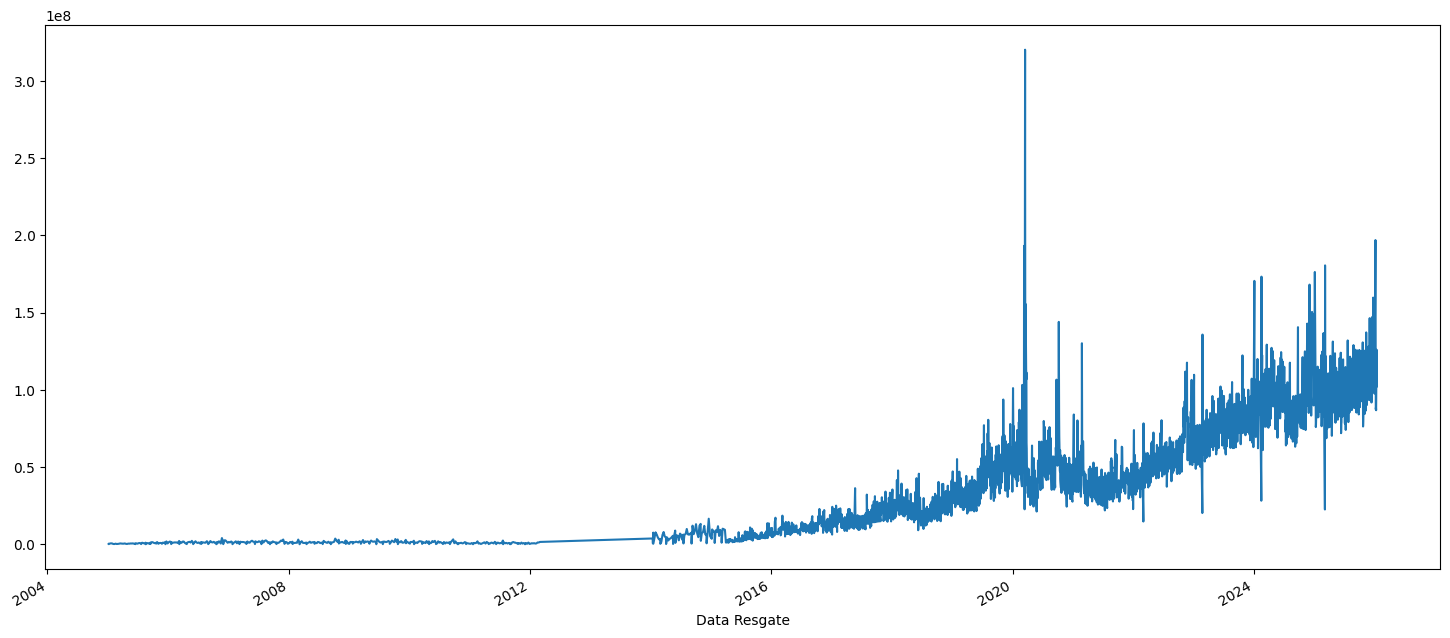

In [19]:
selic.groupby('Data Resgate').sum().Valor.plot()

Venda semanal Tesouro Selic X retorno Ibov

In [20]:
selic_semanal = selic.reset_index(level=[0], drop=True)
selic_semanal.set_index('Data Resgate', inplace=True)
selic_semanal = selic_semanal.resample('W').sum()
selic_semanal

Quantidade         Valor
Data Resgate                          
2005-01-09        109.40  2.363506e+05
2005-01-16        203.40  4.414528e+05
2005-01-23        263.60  5.713181e+05
2005-01-30        238.80  5.209024e+05
2005-02-06         83.00  1.814714e+05
...                  ...           ...
2025-12-21      34688.57  6.224873e+08
2025-12-28      22588.87  4.063940e+08
2026-01-04      13126.49  2.365721e+08
2026-01-11      32024.64  5.787634e+08
2026-01-18      12597.34  2.281496e+08

[1098 rows x 2 columns]

In [21]:
ibov = yf.download('^BVSP')['Close'].resample('W').last().pct_change()[1:]

/tmp/ipykernel_104456/91363168.py:1: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  1 of 1 completed


In [22]:
selic_ibov = pd.concat([selic_semanal['Valor'].pct_change()[1:], ibov], axis=1).dropna()[1:]
selic_ibov.columns = ['Recompra(%)', 'IBOV(%)']
selic_ibov

Recompra(%)   IBOV(%)
2026-01-04    -0.417875 -0.002225
2026-01-11     1.446457  0.017634
2026-01-18    -0.605798  0.012066

In [23]:
selic_ibov = selic_ibov[selic_ibov.index >'2022']

fig = go.Figure()
fig.add_trace(go.Scatter(name='Recompras(%)', x=selic_ibov.index,  y=selic_ibov['Recompra(%)'],marker=dict(color='blue')))
fig.add_trace(go.Scatter(name='IBOV(%)', x=selic_ibov.index,  y=selic_ibov['IBOV(%)'],marker=dict(color='red')))
fig.update_layout(barmode='group')
fig.show()
     

In [24]:

fig = go.Figure()
fig.add_trace(go.Bar(name='Recompras(%)', x=selic_ibov.index,  y=selic_ibov['Recompra(%)'],marker=dict(color='blue')))
fig.add_trace(go.Bar(name='IBOV(%)', x=selic_ibov.index,  y=selic_ibov['IBOV(%)'],marker=dict(color='red')))
fig.update_layout(barmode='group')
fig.show()
     